In [18]:
"""
Finance & Cost Analytics Dashboard
==================================

Dieses Projekt zeigt, wie man mit Python (pandas, numpy, matplotlib, seaborn, scikit-learn)
eine Kostenanalyse inklusive Forecasting aufbaut.

Features:
- Simulierte Monatskosten (Material, Personal, Betrieb)
- KPI-Berechnung (Gesamtkosten, Durchschnittskosten)
- Visualisierung:
  - Gesamtkostenentwicklung
  - Kostenentwicklung nach Kategorien
  - Balkendiagramm der DurchschnittskostenKostenentwicklung
- Forecasting: Lineare Regression zur Vorhersage der Gesamtkosten für die nächsten 6 Monate

## Technologien

- Python 3.x
- Bibliotheken: pandas, numpy, matplotlib, seaborn, scikit-learn
"""
#Bibliotheken importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

print("pandas Version:", pd.__version__)
print("numpy Version:", np.__version__)



pandas Version: 2.3.2
numpy Version: 2.3.3


In [19]:
#Daten generieren
# Simulierte Monatsdaten für ein Jahr
months = pd.date_range(start="2024-01-01", periods=12, freq='ME')
data = pd.DataFrame({
    "Month": months,
    "Material_Cost": np.random.randint(20000, 50000, 12),
    "Personnel_Cost": np.random.randint(15000, 40000, 12),
    "Operating_Cost": np.random.randint(10000, 30000, 12)
})

# Gesamtkosten berechnen
data["Total_Cost"] = data["Material_Cost"] + data["Personnel_Cost"] + data["Operating_Cost"]

data.head()


,Month,Material_Cost,Personnel_Cost,Operating_Cost,Total_Cost
0,2024-01-31,46383,20781,24041,91205
1,2024-02-29,24987,21325,23523,69835
2,2024-03-31,28749,38541,19695,86985
3,2024-04-30,35223,30296,25426,90945
4,2024-05-31,31967,25704,28459,86130


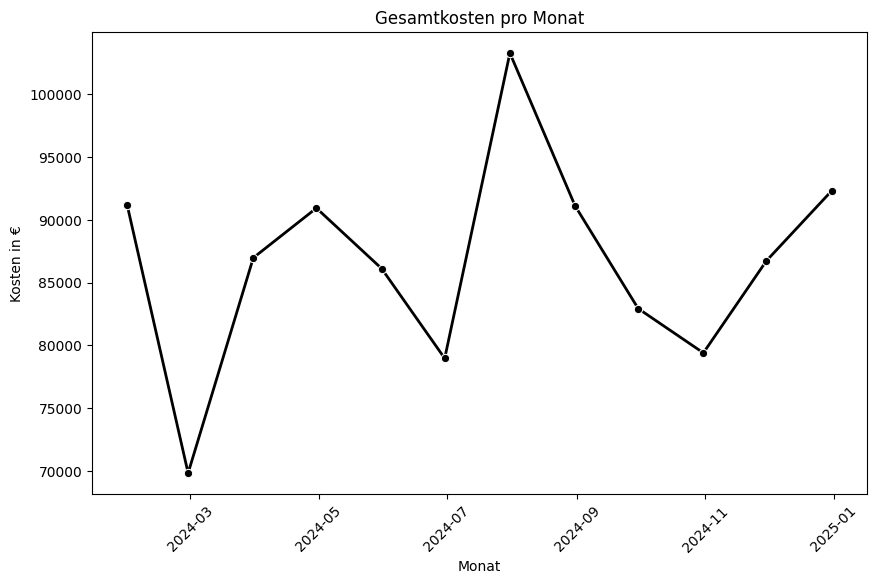

In [20]:
#Visualisierung: Gesamtkosten pro Monat

plt.figure(figsize=(10,6))
sns.lineplot(data=data, x="Month", y="Total_Cost", marker="o", linewidth=2, color="black")
plt.title("Gesamtkosten pro Monat")
plt.xlabel("Monat")
plt.ylabel("Kosten in €")
plt.xticks(rotation=45)
plt.show()



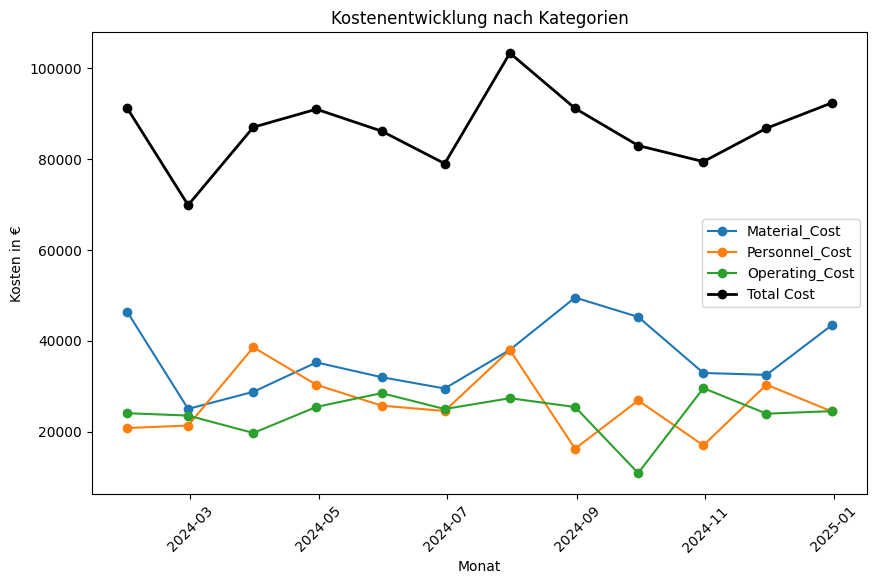

In [21]:
#Visualisierung: Kosten nach Kategorien
plt.figure(figsize=(10,6))
for col in ["Material_Cost", "Personnel_Cost", "Operating_Cost"]:
    plt.plot(data["Month"], data[col], marker="o", label=col)

plt.plot(data["Month"], data["Total_Cost"], marker="o", color="black", linewidth=2, label="Total Cost")
plt.title("Kostenentwicklung nach Kategorien")
plt.xlabel("Monat")
plt.ylabel("Kosten in €")
plt.xticks(rotation=45)
plt.legend()
plt.show()


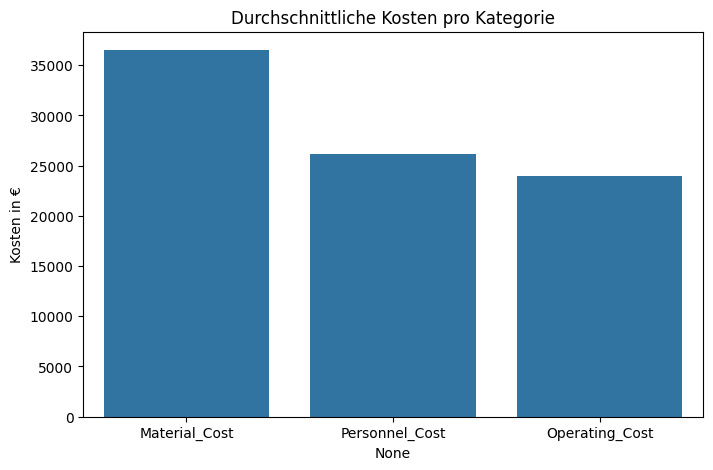

In [22]:
#KPI: Durchschnittskosten pro Kategorie
avg_costs = data[["Material_Cost", "Personnel_Cost", "Operating_Cost"]].mean()

plt.figure(figsize=(8,5))
sns.barplot(x=avg_costs.index, y=avg_costs.values)
plt.title("Durchschnittliche Kosten pro Kategorie")
plt.ylabel("Kosten in €")
plt.show()


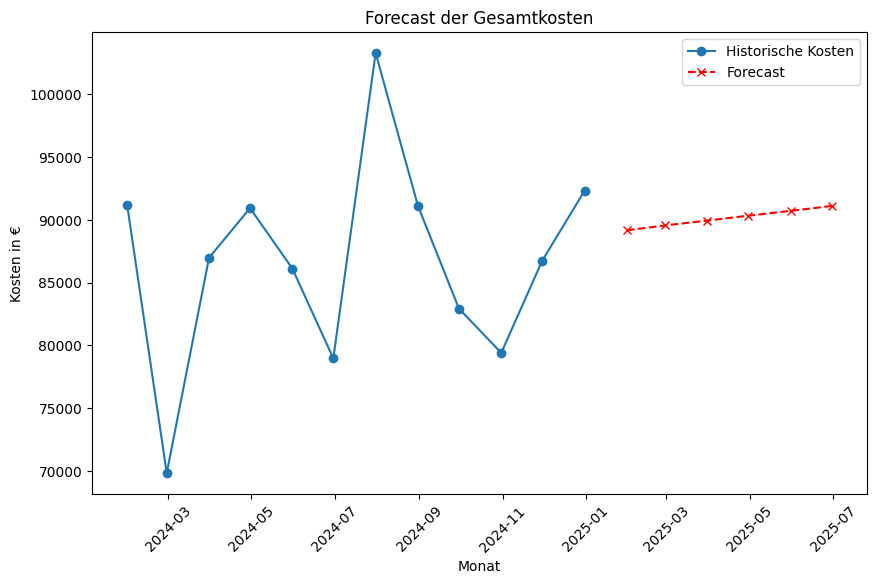

In [23]:
# Forecasting: Lineare Regression für Gesamtkosten
# Monat numerisch kodieren
data["Month_Num"] = np.arange(len(data))
X = data[["Month_Num"]]
y = data["Total_Cost"]

#Modell trainieren
model = LinearRegression()
model.fit(X, y)

# Vorhersage für die nächsten 6 Monate
future_months = pd.DataFrame({
    "Month_Num": np.arange(len(data), len(data)+6)
})
forecast = model.predict(future_months)

#Neue Zeitachse für Vorhersage
future_dates = pd.date_range(start=data["Month"].iloc[-1] + pd.Timedelta(days=30), periods=6, freq='ME')

# Plot Forecast
plt.figure(figsize=(10,6))
plt.plot(data["Month"], data["Total_Cost"], marker="o", label="Historische Kosten")
plt.plot(future_dates, forecast, marker="x", linestyle="--", color="red", label="Forecast")
plt.title("Forecast der Gesamtkosten")
plt.xlabel("Monat")
plt.ylabel("Kosten in €")
plt.legend()
plt.xticks(rotation=45)
plt.show()
